In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk


### Read the .csv file using Pandas. Take a look at the top few records.

In [2]:
review_df=pd.read_csv(r'K8 Reviews v0.2.csv')
review_df.head(8)

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...
5,0,Only I'm telling don't buyI'm totally disappoi...
6,1,"Phone is awesome. But while charging, it heats..."
7,0,The battery level has worn down


In [3]:
review_df.describe()

,sentiment
count,14675.000000
mean,0.474480
std,0.499365
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [4]:
review_df[review_df.sentiment==1] #Positive reviews

,sentiment,review
0,1,Good but need updates and improvements
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
6,1,"Phone is awesome. But while charging, it heats..."
11,1,Good phone but charger not working / damage wi...
...,...,...
14670,1,"I really like the phone, Everything is working..."
14671,1,The Lenovo K8 Note is awesome. It takes best p...
14672,1,Awesome Gaget.. @ this price
14673,1,This phone is nice processing will be successf...


In [5]:
review_df[review_df.sentiment==0] #Neg reviews

,sentiment,review
1,0,"Worst mobile i have bought ever, Battery is dr..."
4,0,The worst phone everThey have changed the last...
5,0,Only I'm telling don't buyI'm totally disappoi...
7,0,The battery level has worn down
8,0,It's over hitting problems...and phone hanging...
...,...,...
14663,0,Waste of buying this mobileMobile getting over...
14664,0,Mobile is very worst and customer support very...
14666,0,I am facing problem with network connection.Wh...
14668,0,Not so good.


In [6]:
review_df.head(8)

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...
5,0,Only I'm telling don't buyI'm totally disappoi...
6,1,"Phone is awesome. But while charging, it heats..."
7,0,The battery level has worn down


In [7]:
review_df['sentiment'].value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

In [8]:
review_df['sentiment'].shape

(14675,)

In [9]:
review_df.review.count()

14675

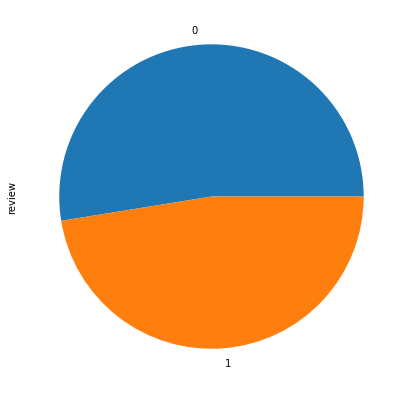

In [10]:

# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
review_df.groupby('sentiment').review.count().plot.pie()

# Show Plot
plt.show()

### Normalize casings for the review text and extract the text into a list for easier manipulation.

### Review to Lower Case

In [11]:
review_df['review']=review_df['review'].astype(str).str.lower()
review_df['review'][:10]

0               good but need updates and improvements
1    worst mobile i have bought ever, battery is dr...
2    when i will get my 10% cash back.... its alrea...
3                                                 good
4    the worst phone everthey have changed the last...
5    only i'm telling don't buyi'm totally disappoi...
6    phone is awesome. but while charging, it heats...
7                      the battery level has worn down
8    it's over hitting problems...and phone hanging...
9    a lot of glitches dont buy this thing better g...
Name: review, dtype: object

In [12]:
Review_List= review_df['review'].tolist()

In [13]:
Review_List[1],Review_List[5]

("worst mobile i have bought ever, battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if i put mobile idle its getting discharged.this is biggest lie from amazon & lenove which is not at all expected, they are making full by saying that battery is 4000mah & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.don't know how lenovo will survive by making full of us.please don;t go for this else you will regret like me.",
 "only i'm telling don't buyi'm totally disappointedpoor batterypoor camerawaste of money")

In [14]:
len(Review_List)

14675

##  Tokenize the reviews using NLTKs word_tokenize function.



In [15]:
Tokenized_Review=[]
for text in Review_List:
    Tokenized_Review.append(nltk.tokenize.word_tokenize(text))
    
    

In [16]:
Tokenized_Review[0]

['good', 'but', 'need', 'updates', 'and', 'improvements']

### Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.

In [17]:
nltk.pos_tag(Tokenized_Review[0])

[('good', 'JJ'),
 ('but', 'CC'),
 ('need', 'VBP'),
 ('updates', 'NNS'),
 ('and', 'CC'),
 ('improvements', 'NNS')]

In [18]:
Review_POS=[]
for comments in Tokenized_Review:
    Review_POS.append(nltk.pos_tag(comments))

In [19]:
# nltk.download('averaged_perceptron_tagger')

In [20]:
Review_POS[0]

[('good', 'JJ'),
 ('but', 'CC'),
 ('need', 'VBP'),
 ('updates', 'NNS'),
 ('and', 'CC'),
 ('improvements', 'NNS')]

### Include only nouns

In [21]:
Review_NounNAdj=[]

   
for postaggedComment  in Review_POS:
    Review_NounNAdj.append([word for (word, PosTag) in postaggedComment  if  PosTag in ('NNS', 'N', 'NNS', 'NNP', 'NNPS' )])
  

In [22]:
Review_NounNAdj[0]

['updates', 'improvements']

In [23]:
##Another way to get POS Tagging

%%time
from textblob import TextBlob
poslist = []
for text in Review_List:
   blob = TextBlob(text)
   poslist.append(blob.pos_tags)

UsageError: Line magic function `%%time` not found.


## Lemmatize. 

Different forms of the terms need to be treated as one.

In [24]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()

In [25]:
Lemma_Review=[]

   
# for comment  in Review_NounNAdj:
#     temp=[]
#     for word in comment:
#         temp.append(lemmatizer.lemmatize(word))
        
#     Lemma_Review.append(temp)
for comment  in Review_NounNAdj:
    Lemma_Review.append([lemmatizer.lemmatize(word)  for word in comment])

Lemma_Review[:10] # top 5 items in List

[['update', 'improvement'],
 ['hour', 'us', 'hour'],
 [],
 [],
 [],
 [],
 ['..', 'k8'],
 [],
 ['problem', 'problem', 'year'],
 ['glitch', 'option']]

## Remove stopwords and punctuation (if there are any). 
### Combining the corpus to single list

In [26]:
from nltk.corpus import stopwords
from string import punctuation

In [27]:
# Removing Puncuation and Stop Words:
my_stopwords = stopwords.words('english')+list(punctuation) + ["..."] +[".."] +["."]
    
Review_NoStop1=[ x for x in Lemma_Review if x not in my_stopwords]


In [28]:
Review_NoStop1[:10]

[['update', 'improvement'],
 ['hour', 'us', 'hour'],
 [],
 [],
 [],
 [],
 ['..', 'k8'],
 [],
 ['problem', 'problem', 'year'],
 ['glitch', 'option']]

In [29]:
# def remove_stopword(x):
#     return [y for y in x if y not in stopwords.words('english')]

In [30]:
Review_NoStop=[ x for x in Review_NoStop1 if x !=[] ]
               


In [32]:
    
# Review_NoStop=[ x for x in Review_NoStop2 if x not in (stopwords.words('english')+list(punctuation)+[".."] +["..."]+ [""] )]


In [33]:
Review_NoStop[:10]

[['update', 'improvement'],
 ['hour', 'us', 'hour'],
 ['..', 'k8'],
 ['problem', 'problem', 'year'],
 ['glitch', 'option'],
 ['month'],
 ['i', 'month'],
 ['i', '..', '..'],
 ['..', 'solution'],
 ['option']]

## Remove data such as '..','...','.','....','.....'

In [34]:
# XY=[]
# for ele in Review_NoStop:
#     for x in ele:
#         if x not in ('..','...','.','....','.....'):
#             XY.append(x)
        

In [35]:
Review_Clean= []

In [36]:
for ele  in Review_NoStop:
    Review_Clean.append([y for y in ele  if  y not in ('..','...','.','....','.....') ])
  


In [37]:
Review_Clean[:10]

[['update', 'improvement'],
 ['hour', 'us', 'hour'],
 ['k8'],
 ['problem', 'problem', 'year'],
 ['glitch', 'option'],
 ['month'],
 ['i', 'month'],
 ['i'],
 ['solution'],
 ['option']]

In [38]:


# clean_vocab=vocab.apply(lambda x:remove_stopword(x)) 
# for item in Lemma_Review:
#     item.apply(lambda x:remove_stopword(x)) 
# print(item)

   
# for comment  in Lemma_Review:
#     temp=[]
#     for word in comment:
#         word=word.tolist()
#         temp.append(word.apply(lambda x:remove_stopword(x)))
        
#     # print(temp)


## Word cloud

In [39]:
#all corpus made to single list using .extend()
vocab = []
for el in Review_Clean:
    vocab.extend(el) 

vocab[:20],len(vocab)

(['update',
  'improvement',
  'hour',
  'us',
  'hour',
  'k8',
  'problem',
  'problem',
  'year',
  'glitch',
  'option',
  'month',
  'i',
  'month',
  'i',
  'solution',
  'option',
  'specification',
  'function',
  'speekars'],
 10566)

In [122]:
# Import the wordcloud library
from wordcloud import WordCloud

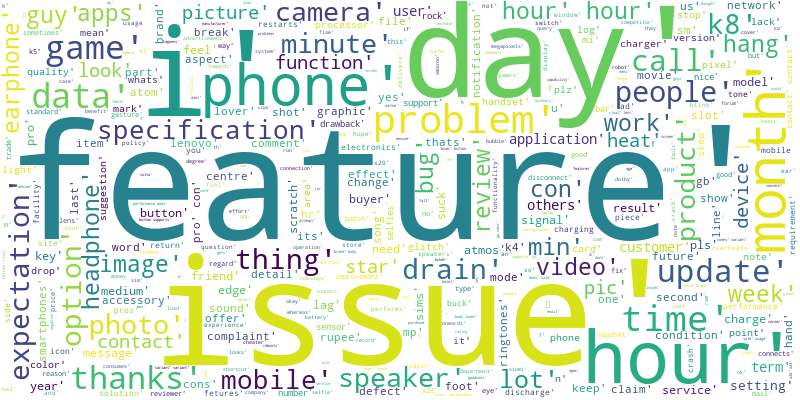

In [123]:
# Join the different processed titles together.

# long_string = ','.join(list(papers['paper_text_processed'].values))
long_string=str(vocab)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue',width=800, height=400)
# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()


In [ ]:
# Lemma_Review

## Create a topic model using LDA on the cleaned up data with 12 topics.

Print out the top terms for each topic anc checking the coherence of the model with the c_v metric?

In [40]:
import gensim.corpora as corpora


# Create Dictionary
id2word = corpora.Dictionary(Review_Clean)

# Create Corpus
texts = Review_Clean

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
# print(corpus[:1][0])
print(corpus[:1])

[[(0, 1), (1, 1)]]


In [41]:
# print(id2word)

In [63]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(Review_Clean)
print(dictionary)

Dictionary(1536 unique tokens: ['improvement', 'update', 'hour', 'us', 'k8']...)


In [64]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in Review_Clean]

In [65]:
doc_term_matrix[:3]

[[(0, 1), (1, 1)], [(2, 2), (3, 1)], [(4, 1)]]

In [66]:
doc_term_matrix[:1][0]

[(0, 1), (1, 1)]

In [67]:
# Build LDA model
import time

In [68]:
# gensim for LDA 
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [69]:
%%time
lda_model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=10, 
                                           random_state=42,
                                           passes=10,
                                           per_word_topics=True)


CPU times: total: 3.98 s
Wall time: 3.99 s


In [70]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.153*"data" + 0.114*"call" + 0.094*"thing" + 0.060*"earphone" + 0.055*"heat" + 0.038*"user" + 0.037*"function" + 0.019*"second" + 0.015*"@" + 0.013*"gb"


Topic: 1 
Words: 0.267*"day" + 0.230*"hour" + 0.077*"*" + 0.049*"k8" + 0.044*"camera" + 0.032*"headphone" + 0.015*"service" + 0.015*"edge" + 0.015*"result" + 0.007*"claim"


Topic: 2 
Words: 0.304*"i" + 0.081*"speaker" + 0.042*"guy" + 0.034*"device" + 0.026*"feel" + 0.022*"atmos" + 0.019*"slot" + 0.017*"model" + 0.017*"word" + 0.015*"need"


Topic: 3 
Words: 0.402*"issue" + 0.078*"drain" + 0.057*"con" + 0.036*"star" + 0.022*"game" + 0.020*"message" + 0.016*"friend" + 0.016*"detail" + 0.016*"graphic" + 0.013*"lag"


Topic: 4 
Words: 0.250*"phone" + 0.086*"expectation" + 0.053*"contact" + 0.041*"apps" + 0.040*"look" + 0.033*"setting" + 0.024*"scratch" + 0.023*"pls" + 0.020*"charge" + 0.015*"buyer"


Topic: 5 
Words: 0.202*"problem" + 0.076*"specification" + 0.073*"min" + 0.050*"image" + 0.039*"......" + 0.036*"video" 

In [77]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# from pyLDAvis import gensim

In [82]:
 #Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\keert\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.395349  0.033428       1        1  14.189148
3     -0.065634  0.121027       2        1  10.753913
2     -0.045606 -0.128706       3        1  10.311805
8      0.013944 -0.268071       4        1  10.086204
6     -0.055240  0.207290       5        1   9.681024
4      0.016144  0.101878       6        1   9.423892
9     -0.065972  0.053669       7        1   9.181601
0     -0.034945 -0.080391       8        1   8.878006
5     -0.078689 -0.076217       9        1   8.865917
7     -0.079352  0.036094      10        1   8.628489, topic_info=        Term        Freq       Total Category  logprob  loglift
21   feature  515.000000  515.000000  Default  30.0000  30.0000
33     issue  457.000000  457.000000  Default  29.0000  29.0000
18       day  401.000000  401.000000  Default  28.0000  28.0000
10         i  331.000000  331.000000  Default  27.0000  27.0000
2       hour  348.000000  348.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
49     buyer    6.164915   21.366150  Topic10  -4.9964   1.2072
203      key    6.163654   27.154127  Topic10  -4.9966   0.9672
1     update    7.918471  118.820666  Topic10  -4.7461  -0.2583
109    model    4.959137   24.203233  Topic10  -5.2141   0.8648
185   friend    4.647902   26.843061  Topic10  -5.2789   0.6965

[394 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
135       1  0.989634         *
778       4  0.830554         +
179       9  0.973261    ......
190       6  0.925474   .......
408       2  0.611564  ........
...     ...       ...       ...
6         7  0.955691      year
192       8  0.902041       yes
125       1  0.632094         ’
125       7  0.316047         ’
241       4  0.933876         🔋

[400 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 9, 7, 5, 10, 1, 6, 8])

In [78]:
pyLDAvis.__version__

'3.2.1'

In [83]:
 #Compute Perplexity
print('Perplexity: ', lda_model.log_perplexity(doc_term_matrix)) # a measure of how good the model is. lower the better.


Perplexity:  -6.360985931139761


In [84]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=Review_Clean, dictionary=dictionary,
 coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.5963680198476624


## Changing number of topics to 8

In [91]:
%%time
lda_model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=8, 
                                           random_state=42,
                                           passes=10,
                                           per_word_topics=True)


CPU times: total: 3.98 s
Wall time: 4 s


In [92]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.092*"drain" + 0.088*"thing" + 0.078*"k8" + 0.061*"lot" + 0.052*"heat" + 0.048*"image" + 0.033*"user" + 0.025*"button" + 0.024*"result" + 0.021*"edge"


Topic: 1 
Words: 0.226*"day" + 0.196*"hour" + 0.117*"phone" + 0.065*"*" + 0.038*"photo" + 0.037*"camera" + 0.027*"headphone" + 0.018*"function" + 0.014*"message" + 0.007*"video"


Topic: 2 
Words: 0.254*"i" + 0.068*"speaker" + 0.040*"guy" + 0.026*"video" + 0.025*"device" + 0.020*"work" + 0.017*"brand" + 0.016*"slot" + 0.015*"accessory" + 0.015*"atmos"


Topic: 3 
Words: 0.312*"feature" + 0.258*"issue" + 0.064*"game" + 0.031*"min" + 0.023*"star" + 0.010*"graphic" + 0.010*"lag" + 0.010*"rupee" + 0.009*"friend" + 0.009*"detail"


Topic: 4 
Words: 0.132*"time" + 0.122*"data" + 0.073*"expectation" + 0.055*"mobile" + 0.045*"contact" + 0.036*"week" + 0.036*"apps" + 0.025*"feel" + 0.019*"pls" + 0.018*"charge"


Topic: 5 
Words: 0.070*"specification" + 0.065*"con" + 0.054*"earphone" + 0.042*"pic" + 0.036*"......" + 0.034*"cust

In [93]:
 #Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\keert\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.308970 -0.195680       1        1  17.013099
3     -0.275563 -0.256562       2        1  15.600416
6     -0.074516  0.200947       3        1  13.112602
2      0.049198  0.100475       4        1  12.197149
7     -0.000469  0.068851       5        1  11.201837
4     -0.003579 -0.043777       6        1  11.154999
5      0.001384  0.051235       7        1  10.010796
0     -0.005426  0.074510       8        1   9.709104, topic_info=        Term        Freq       Total Category  logprob  loglift
21   feature  514.000000  514.000000  Default  30.0000  30.0000
33     issue  427.000000  427.000000  Default  29.0000  29.0000
18       day  407.000000  407.000000  Default  28.0000  28.0000
10         i  328.000000  328.000000  Default  27.0000  27.0000
2       hour  353.000000  353.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
353       ok    3.537504    4.314880   Topic8  -5.6699   2.1335
964    visit    3.429698    4.206576   Topic8  -5.7008   2.1279
134   second   14.265651   21.093149   Topic8  -4.2754   1.9410
309   charge    6.633968   28.252422   Topic8  -5.0411   0.8831
140     type    3.770006    5.757431   Topic8  -5.6062   1.9087

[329 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
135       1  0.992145          *
778       2  0.831257          +
179       7  0.984777     ......
408       2  0.642609   ........
492       2  0.954458  .........
...     ...       ...        ...
6         6  0.590881       year
192       8  0.876032        yes
858       6  0.729390         yr
125       8  0.891644          ’
241       5  0.850839          🔋

[334 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 7, 3, 8, 5, 6, 1])

In [94]:
 #Compute Perplexity
print('Perplexity: ', lda_model.log_perplexity(doc_term_matrix)) # a measure of how good the model is. lower the better.


Perplexity:  -6.253023913459027


In [95]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=Review_Clean, dictionary=dictionary,
 coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.5833787750919727
